# Steps involved in the project
- Obtaining the dataset.
- Understanding the dataset.
- Data Cleaning
- Loading the training set
- Data Preprocessing-Images
- Data Preprocessing-Captions
- Data Preperation using generator function.
- Word Embeddings
- Model Architecture
- Inference 
- Evaluation


# Preprocessing the text part.

In [1]:
# Read the text captions.
def readTextFile(path):
    with open(path) as f:
        captions = f.read()
    return captions


In [2]:
captions = readTextFile('./Flickr8k/Flickr8k.token.txt')
captions = captions.split("\n")[:-1]
print(len(captions))
print((captions[0]))
print(captions[1])

40460
1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg#1	A girl going into a wooden building .


In [3]:
x,y = captions[0].split('\t')
print(x)

1000268201_693b08cb0e.jpg#0


In [4]:
# Dictionary to map each image with the list of captions it has
descriptions = {}
for x in captions:
    first,second = x.split('\t')
    img_name = first.split('.')[0]
    
    # If the img_id is already present or not.
    if descriptions.get(img_name) is None:
        descriptions[img_name] = []
        
    descriptions[img_name].append(second)
    
    
    

In [5]:
descriptions["1000268201_693b08cb0e"] 

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

# Preprocessing the images

In [6]:
import cv2
import matplotlib.pyplot as plt
img_path = 'Flickr8k/Flicker8k_Dataset/'
img = cv2.imread(img_path+'1000268201_693b08cb0e.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

(500, 375, 3)


# Data Cleaning

## Text Cleaning

In [7]:
import re

def clean_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub("[^a-z]+"," ",sentence)
    sentence = sentence.split()
    
    sentence = [s for s in sentence if len(s)>1]
    sentence = " ".join(sentence)
    return sentence

In [8]:
sent = clean_text("A cat is sitting in the house no. 64 !!")
print(sent)

cat is sitting in the house no


In [9]:
for key,caption_list in descriptions.items():
    for i in range(len(caption_list)):
        caption_list[i] = clean_text(caption_list[i])

In [10]:
descriptions["1000268201_693b08cb0e"] 

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

## Creating the Vocabulary


### One method to create our vocab is by using the set data structure

In [11]:
vocab = set()
vocab.update(["hello","hello","hi"])
vocab.update(["hi","mango"])
print(vocab)

{'hi', 'mango', 'hello'}


In [12]:
vocab = set()
for key in descriptions.keys():
    for sentence in descriptions[key]:
        vocab.update(sentence.split())
print(len(vocab))

8424


### Now we want that we would keep those word in the dictionary which have appeared at least 10 times
### Removing the less frequent words from the dictionary


In [13]:
# Making the list of total words.
total_words = []
for key in descriptions.keys():
    for sentence in descriptions[key]:
        [total_words.append(i) for i in sentence.split()]
print(len(total_words))
  

373837


In [14]:
import collections
counter = collections.Counter(total_words)
freq_cnt = dict(counter)
print(len(freq_cnt))
print(freq_cnt)

8424
{'child': 1545, 'in': 18987, 'pink': 739, 'dress': 348, 'is': 9345, 'climbing': 507, 'up': 1302, 'set': 109, 'of': 6723, 'stairs': 109, 'an': 2432, 'entry': 1, 'way': 53, 'girl': 3328, 'going': 149, 'into': 1074, 'wooden': 284, 'building': 511, 'little': 1768, 'playhouse': 6, 'the': 18420, 'to': 3176, 'her': 1178, 'cabin': 4, 'black': 3848, 'dog': 8138, 'and': 8863, 'spotted': 38, 'are': 3505, 'fighting': 133, 'tri': 14, 'colored': 221, 'playing': 2008, 'with': 7765, 'each': 430, 'other': 773, 'on': 10746, 'road': 398, 'white': 3959, 'brown': 2578, 'spots': 29, 'staring': 57, 'at': 2916, 'street': 944, 'two': 5643, 'dogs': 2125, 'different': 46, 'breeds': 5, 'looking': 744, 'pavement': 48, 'moving': 41, 'toward': 146, 'covered': 372, 'paint': 62, 'sits': 577, 'front': 1386, 'painted': 64, 'rainbow': 22, 'hands': 246, 'bowl': 30, 'sitting': 1368, 'large': 1237, 'small': 1278, 'grass': 1622, 'plays': 526, 'fingerpaints': 3, 'canvas': 6, 'it': 401, 'there': 304, 'pigtails': 14, 'pain

In [15]:
threshold = 10
more_freq_cnt = [x for x in freq_cnt if freq_cnt[x]>threshold]
total_words = more_freq_cnt

In [16]:
print(len(total_words))

1845


# Preparing the training data

In [17]:
def read_text_file(path):
    with open(path) as f:
        return f.read()



In [18]:
train_file_data = read_text_file('./Flickr8k/Flickr_8k.trainImages.txt')
print(type(train_file_data))
print(train_file_data)



<class 'str'>
2513260012_03d33305cf.jpg
2903617548_d3e38d7f88.jpg
3338291921_fe7ae0c8f8.jpg
488416045_1c6d903fe0.jpg
2644326817_8f45080b87.jpg
218342358_1755a9cce1.jpg
2501968935_02f2cd8079.jpg
2699342860_5288e203ea.jpg
2638369467_8fc251595b.jpg
2926786902_815a99a154.jpg
2851304910_b5721199bc.jpg
3423802527_94bd2b23b0.jpg
3356369156_074750c6cc.jpg
2294598473_40637b5c04.jpg
1191338263_a4fa073154.jpg
2380765956_6313d8cae3.jpg
3197891333_b1b0fd1702.jpg
3119887967_271a097464.jpg
2276499757_b44dc6f8ce.jpg
2506892928_7e79bec613.jpg
2187222896_c206d63396.jpg
2826769554_85c90864c9.jpg
3097196395_ec06075389.jpg
3603116579_4a28a932e2.jpg
3339263085_6db9fd0981.jpg
2532262109_87429a2cae.jpg
2076906555_c20dc082db.jpg
2502007071_82a8c639cf.jpg
3113769557_9edbb8275c.jpg
3325974730_3ee192e4ff.jpg
1655781989_b15ab4cbff.jpg
1662261486_db967930de.jpg
2410562803_56ec09f41c.jpg
2469498117_b4543e1460.jpg
69710415_5c2bfb1058.jpg
3414734842_beb543f400.jpg
3006217970_90b42e6b27.jpg
2192411521_9c7e488c5e.jpg
35

In [19]:
test_file_data = read_text_file('./Flickr8k/Flickr_8k.testImages.txt')
print(type(test_file_data))
print(test_file_data)

<class 'str'>
3385593926_d3e9c21170.jpg
2677656448_6b7e7702af.jpg
311146855_0b65fdb169.jpg
1258913059_07c613f7ff.jpg
241347760_d44c8d3a01.jpg
2654514044_a70a6e2c21.jpg
2339106348_2df90aa6a9.jpg
256085101_2c2617c5d0.jpg
280706862_14c30d734a.jpg
3072172967_630e9c69d0.jpg
3482062809_3b694322c4.jpg
1167669558_87a8a467d6.jpg
2847615962_c330bded6e.jpg
3344233740_c010378da7.jpg
2435685480_a79d42e564.jpg
3110649716_c17e14670e.jpg
2511019188_ca71775f2d.jpg
2521770311_3086ca90de.jpg
2723477522_d89f5ac62b.jpg
2218609886_892dcd6915.jpg
3745451546_fc8ec70cbd.jpg
2844018783_524b08e5aa.jpg
3100251515_c68027cc22.jpg
2207244634_1db1a1890b.jpg
2943023421_e297f05e11.jpg
3286822339_5535af6b93.jpg
2479652566_8f9fac8af5.jpg
1394368714_3bc7c19969.jpg
872622575_ba1d3632cc.jpg
2309860995_c2e2a0feeb.jpg
241347204_007d83e252.jpg
3502343542_f9b46688e5.jpg
757332692_6866ae545c.jpg
2748729903_3c7c920c4d.jpg
494792770_2c5f767ac0.jpg
3213992947_3f3f967a9f.jpg
2295750198_6d152d7ceb.jpg
2358898017_24496b80e8.jpg
322205

In [20]:
train = [row for row in train_file_data.split("\n")[:-1]]
train = [i.split('.')[0] for i in train]
print(len(train))
print(train[:10])

6000
['2513260012_03d33305cf', '2903617548_d3e38d7f88', '3338291921_fe7ae0c8f8', '488416045_1c6d903fe0', '2644326817_8f45080b87', '218342358_1755a9cce1', '2501968935_02f2cd8079', '2699342860_5288e203ea', '2638369467_8fc251595b', '2926786902_815a99a154']


In [21]:
test = [row for row in test_file_data.split("\n")[:-1]]
test = [i.split('.')[0] for i in test]
print(len(test))
print(test[:10])

1000
['3385593926_d3e9c21170', '2677656448_6b7e7702af', '311146855_0b65fdb169', '1258913059_07c613f7ff', '241347760_d44c8d3a01', '2654514044_a70a6e2c21', '2339106348_2df90aa6a9', '256085101_2c2617c5d0', '280706862_14c30d734a', '3072172967_630e9c69d0']


In [22]:
# Preparing descriptions for the training data
# Tweak - Add <s> and <e> token to training data.
train_descriptions = {}
for img_id in train:
    train_descriptions[img_id] = []
    for cap in descriptions[img_id]:
        cap_to_append = "startseq "+cap+" endseq";
        train_descriptions[img_id].append(cap_to_append)
    

In [23]:
train_descriptions['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

# Transfer Learning
- Images --> Features
- Text --> Features
## We will only take the features from ResNet model and not the training part. (feature Extraction).

In [24]:
from keras.applications.resnet50 import ResNet50,preprocess_input
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model

Using TensorFlow backend.


In [25]:
model = ResNet50(weights='imagenet',input_shape=(224,224,3))
model.summary()
# ResNet50 model has 50 layers .
# In the summary we could say that there is one more layer --> 'Connected to'.
# This layer is bcz Resnet is not the sequential model ... but there are some skip connections.
# Skip connections helps to solve the problem of vanishing gradients.

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [26]:
# Taking only the feature extraction part and not the classifier part.
from keras.models import Model
model_new = Model(model.input,model.layers[-2].output)
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [27]:
from keras.preprocessing import image



In [28]:
import numpy as np
def preprocess_img(img):
    img = image.load_img(img,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0) # changes (224,224,3)-->(1,224,224,3)
    #Normalization
    img = preprocess_input(img)
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


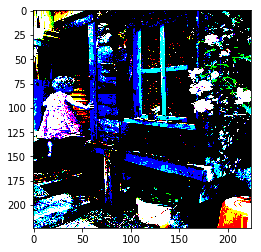

In [29]:
img = preprocess_img('Flickr8k/Flicker8k_Dataset/1000268201_693b08cb0e.jpg')
print(img.shape)
plt.imshow(img[0])

In [30]:
def encode_image(img):
    img = preprocess_img(img)
    feature_vector = model_new.predict(img)
    
    feature_vector = feature_vector.reshape((-1,))
    return feature_vector

In [31]:
i = encode_image('Flickr8k/Flicker8k_Dataset/1000268201_693b08cb0e.jpg')
print(i.shape)
print(i)

(2048,)
[0.04154469 0.17075907 0.29276803 ... 0.05094024 0.3131962  0.8600729 ]


In [32]:
img_path = 'Flickr8k/Flicker8k_Dataset/'
encoding_train = {}

for ix,img_id in enumerate(train):
    image_path = img_path+img_id+".jpg"
    encoding_train[img_id] = encode_image(image_path)
    
    if ix%100 == 0:
        print("Encoding in progree Time Step %d"%ix)
        

Encoding in progree Time Step 0
Encoding in progree Time Step 100
Encoding in progree Time Step 200
Encoding in progree Time Step 300
Encoding in progree Time Step 400
Encoding in progree Time Step 500
Encoding in progree Time Step 600
Encoding in progree Time Step 700
Encoding in progree Time Step 800
Encoding in progree Time Step 900
Encoding in progree Time Step 1000
Encoding in progree Time Step 1100
Encoding in progree Time Step 1200
Encoding in progree Time Step 1300
Encoding in progree Time Step 1400
Encoding in progree Time Step 1500
Encoding in progree Time Step 1600
Encoding in progree Time Step 1700
Encoding in progree Time Step 1800
Encoding in progree Time Step 1900
Encoding in progree Time Step 2000
Encoding in progree Time Step 2100
Encoding in progree Time Step 2200
Encoding in progree Time Step 2300
Encoding in progree Time Step 2400
Encoding in progree Time Step 2500
Encoding in progree Time Step 2600
Encoding in progree Time Step 2700
Encoding in progree Time Step 28

#### As the above step takes lot of time .. So we will store all the features in the disk so that we do not have to run the above cell again and again

In [33]:
import pickle
# Store everything to the disk
with open ("encoded_train_features.pkl","wb") as f:
    pickle.dump(encoding_train,f)

In [34]:
img_path = 'Flickr8k/Flicker8k_Dataset/'
encoding_test = {}

for ix,img_id in enumerate(test):
    image_path = img_path+img_id+".jpg"
    encoding_test[img_id] = encode_image(image_path)
    
    if ix%100 == 0:
        print("Encoding in progree Time Step %d"%ix)

Encoding in progree Time Step 0
Encoding in progree Time Step 100
Encoding in progree Time Step 200
Encoding in progree Time Step 300
Encoding in progree Time Step 400
Encoding in progree Time Step 500
Encoding in progree Time Step 600
Encoding in progree Time Step 700
Encoding in progree Time Step 800
Encoding in progree Time Step 900


In [35]:
# Store everything to the disk
with open ("encoded_test_features.pkl","wb") as f:
    pickle.dump(encoding_test,f)

## Data preprocessing for captions

In [36]:
print(len(total_words))


1845


In [37]:
# Building the vocab.
word_to_idx = {}
idx_to_word = {}
# We reserve 0 index for the empty spaces in the sentence in the end.
for i,word in enumerate(total_words):
    word_to_idx[word] = (i+1)
    idx_to_word[i+1] = word
    

In [38]:
print(word_to_idx["dog"])
print(idx_to_word[6])
print(len(idx_to_word))

23
climbing
1845


In [39]:
idx_to_word[1846] = 'startseq'
word_to_idx['startseq'] = 1846

idx_to_word[1847] = 'endseq'
word_to_idx['endseq'] = 1847


vocab_size = len(word_to_idx)+1
print("Vocab Size ",vocab_size)


Vocab Size  1848


In [41]:
import pickle
with open(".\model_weights\word_to_idx.pkl","wb") as w2i:
    pickle.dump(word_to_idx,w2i)
with open(".\model_weights\idx_to_word.pkl","wb") as i2w:
    pickle.dump(idx_to_word,i2w)


In [42]:
max_len = 0
for key in train_descriptions.keys():
    for cap in train_descriptions[key]:
        max_len = max(max_len,len(cap.split()))


# Data Loader(Generator)

In [43]:
print(vocab_size)

1848


In [44]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
def data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size):
    X1,X2,y = [],[],[]
    n=0;
    while True:
        for key,desc_list in train_descriptions.items():
            n+=1;
            
            photo = encoding_train[key]
            for desc in desc_list:
                seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx]
                for i in range(1,len(seq)):
                    xi = seq[0:i]
                    yi = seq[i]
                    
                    xi = pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi = to_categorical([yi],num_classes=vocab_size)[0]
                    
                    X1.append(photo)
                    X2.append(xi)
                    y.append(yi)
                    
            if n==batch_size:
                yield [[np.array(X1),np.array(X2)],np.array(y)] # We are using 'yield' instead of 'return'
                X1,X2,y = [],[],[]
                n=0
                    
                    
                    
                    
        
    

In [45]:
print(idx_to_word[1847])

endseq


# Word Embeddings

In [46]:
f = open("glove.6b.50d.txt",encoding='utf8')

In [47]:
embedding_index = {}
for line in f:
    values = line.split()
    word = values[0]
    word_embedding = np.array(values[1:],dtype='float')
    embedding_index[word] = word_embedding
    

In [48]:
print(embedding_index['apple'])

[ 0.52042  -0.8314    0.49961   1.2893    0.1151    0.057521 -1.3753
 -0.97313   0.18346   0.47672  -0.15112   0.35532   0.25912  -0.77857
  0.52181   0.47695  -1.4251    0.858     0.59821  -1.0903    0.33574
 -0.60891   0.41742   0.21569  -0.07417  -0.5822   -0.4502    0.17253
  0.16448  -0.38413   2.3283   -0.66682  -0.58181   0.74389   0.095015
 -0.47865  -0.84591   0.38704   0.23693  -1.5523    0.64802  -0.16521
 -1.4719   -0.16224   0.79857   0.97391   0.40027  -0.21912  -0.30938
  0.26581 ]


In [49]:
def get_embedding_matrix():
    emb_dim = 50
    matrix = np.zeros((vocab_size,emb_dim))
    for word,idx in word_to_idx.items():
        
        if embedding_index.get(word) is not None:
            matrix[idx] = embedding_index[word]
    return matrix
        

In [50]:
embedding_matrix = get_embedding_matrix()
print(embedding_matrix.shape)

(1848, 50)


In [51]:
embedding_matrix[1847]
# 1847->startseq (since startseq is not in glove embeddings, so its vector would be zero)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Model Architecture

In [52]:
from keras.layers import Input,Dropout,Dense

# Reducing some of the features of image vector.
input_img_features = Input(shape=(2048,))
inp_img1 = Dropout(0.3)(input_img_features)
inp_img2 = Dense(256,activation='relu')(inp_img1)




In [53]:
input_captions = Input(shape=(max_len,))
inp_cap1 = Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2) # 256 is the size of hidden vectors.



In [54]:
decoder1 = add([inp_img2,inp_cap3])
decoder2 = Dense(256,activation='relu')(decoder1)
outputs = Dense(vocab_size,activation='softmax')(decoder2)

# Combined Model
model = Model(inputs=[input_img_features,input_captions],outputs=outputs)
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 35, 50)       92400       input_3[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_2[0][0]                    
____________________________________________________________________________________________

In [55]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [56]:
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [57]:
# Training Of Model
epochs = 10
batch_size = 3
steps = len(train_descriptions)//batch_size



In [58]:
def train():
    for i in range(epochs):
        generator = data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size)
        model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)
        if i==9:
            model.save('./model_weights/model_'+str(i)+'.h5')

In [59]:
train()

Epoch 1/1
2000/2000 [==============================] - 784s 392ms/step - loss: 4.2901
Epoch 1/1
2000/2000 [==============================] - 713s 356ms/step - loss: 3.5749
Epoch 1/1
2000/2000 [==============================] - 1421s 711ms/step - loss: 3.3203
Epoch 1/1
2000/2000 [==============================] - 850s 425ms/step - loss: 3.1618
Epoch 1/1
2000/2000 [==============================] - 984s 492ms/step - loss: 3.0453
Epoch 1/1
2000/2000 [==============================] - 978s 489ms/step - loss: 2.9595
Epoch 1/1
2000/2000 [==============================] - 957s 479ms/step - loss: 2.8928
Epoch 1/1
2000/2000 [==============================] - 1030s 515ms/step - loss: 2.8360
Epoch 1/1
2000/2000 [==============================] - 1156s 578ms/step - loss: 2.7872
Epoch 1/1
2000/2000 [==============================] - 1121s 561ms/step - loss: 2.7479


# Predictions

In [60]:
def predict_captions(photo):
    in_text = "startseq"
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_len,padding='post')
        
        ypred = model.predict([photo,sequence])
        ypred = ypred.argmax() #Word with max probability (We can also add some randomness)
        word = idx_to_word[ypred]
        in_text += ' '+word
        
        if word == 'endseq':
            break
    
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    
    return final_caption
            
        

man in black shirt is standing in front of basketball court


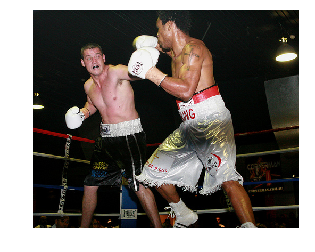

man in black shirt and backpack walks down the street


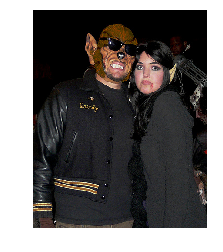

dog swims in the water


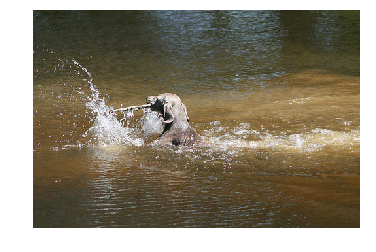

skier is riding down snowy hill


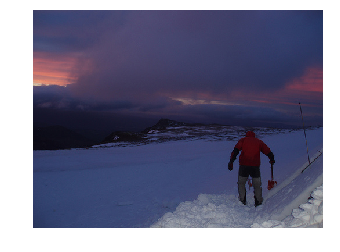

little boy in pajamas is jumping on his stomach


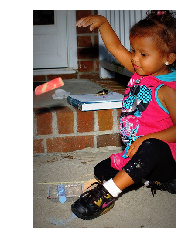

boy in red shirt is jumping on the beach


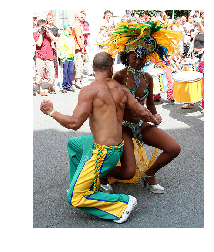

boy is jumping into the air


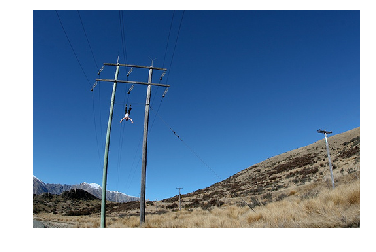

man in blue shirt and black shirt is jumping on the pavement


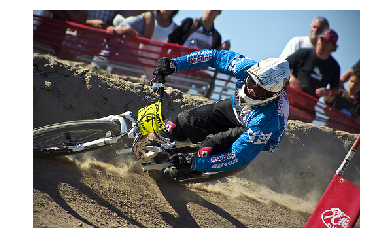

black dog running on sandy beach


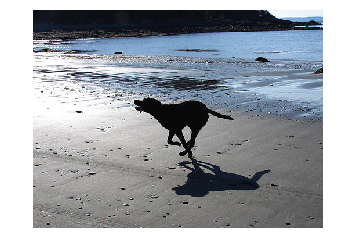

person is riding green and white board in the snow


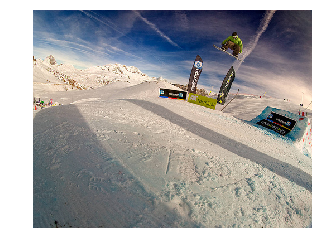

boy in green shirt is jumping into the air


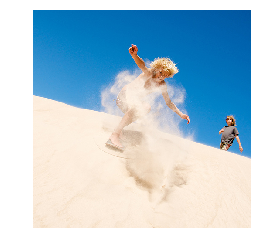

boy in red shirt is sitting in the of playground


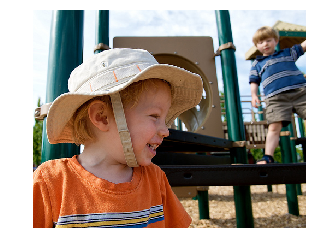

group of people are standing in front of building


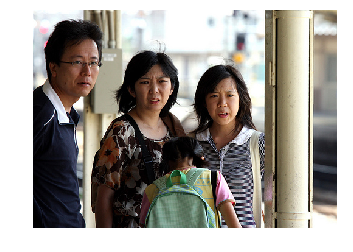

little girl in red dress is swinging on swing


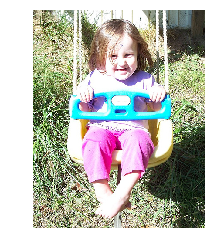

man is wakeboarding on the beach


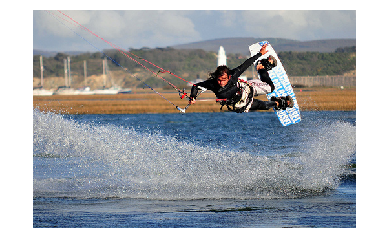

In [61]:
# Pich some random images and see results
for i in range(15):
    idx = np.random.randint(0,1000)
    img_name = list(encoding_test.keys())[idx]
    
    photo_2048 = encoding_test[img_name].reshape((1,2048))
    img = plt.imread(img_path+img_name+".jpg")
    caption = predict_captions(photo_2048)
    print(caption)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    

In [62]:
def predict_caption(photo):
    encoded_image = encode_image(photo)
    photo_2048 = encoded_image.reshape((1,2048))
    img = plt.imread(photo)
    caption = predict_captions(photo_2048)
    print(caption)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

man is sitting on bench with his feet on his bike


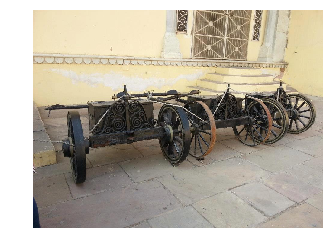

In [63]:
img = 'he.jpg'
predict_caption(img)

35
